In [49]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 获取数据
data = pd.read_csv("./data/nba_2017_nba_players_with_salary.csv")

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,9.6,0.530,0.525,9.2,10.9,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,0.379,5.8,10.9,0.528,0.546,7.8,8.5,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,0.524,0.518,6.9,8.6,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,0.361,7.2,14.8,0.483,0.498,7.2,9.3,0.772,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,NO/SAC,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96


In [4]:
data.shape

(342, 38)

In [5]:
data.describe()

,Rk,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
count,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,320.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.00000,337.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,217.269006,26.444444,21.572515,3.483626,7.725439,0.446096,0.865789,2.440058,0.307016,2.620175,5.282456,0.486749,0.499336,1.621345,2.09152,0.748484,0.899123,2.987719,3.885380,2.064035,0.678947,0.417836,1.227485,1.789766,9.446491,58.198830,21.572807,-0.676023,-0.005789,-0.681813,2.861725,9.186842,98.341053,28.950292,7.294006
std,136.403138,4.295686,8.804018,2.200872,4.646933,0.078992,0.780010,2.021716,0.134691,1.828714,3.531233,0.084118,0.076316,1.532669,1.83971,0.115233,0.756961,1.799029,2.408031,1.892033,0.410237,0.420031,0.826223,0.700428,6.262225,22.282015,8.804121,2.063237,1.614293,2.522014,3.880914,3.585475,2.870091,14.603876,6.516326
min,1.000000,19.000000,2.200000,0.000000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.00000,0.273000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,2.000000,2.200000,-4.430000,-3.920000,-6.600000,-2.320000,-1.600000,87.460000,0.000000,0.030000
25%,100.250000,23.000000,15.025000,1.800000,4.225000,0.402250,0.200000,0.800000,0.280250,1.200000,2.600000,0.446250,0.471000,0.600000,0.90000,0.686000,0.400000,1.700000,2.125000,0.800000,0.400000,0.100000,0.700000,1.300000,5.000000,43.500000,15.025000,-2.147500,-1.222500,-2.422500,0.102500,7.100000,96.850000,19.000000,2.185000
50%,205.500000,26.000000,21.650000,3.000000,6.700000,0.442000,0.700000,2.200000,0.340500,2.200000,4.300000,0.487000,0.502000,1.200000,1.60000,0.768000,0.700000,2.650000,3.300000,1.500000,0.600000,0.300000,1.000000,1.800000,7.950000,66.000000,21.650000,-0.990000,-0.130000,-1.170000,1.410000,8.700000,98.205000,29.000000,4.920000
75%,327.750000,29.000000,29.075000,4.700000,10.400000,0.481000,1.400000,3.600000,0.373500,3.700000,7.600000,0.528750,0.533000,2.000000,2.70000,0.833000,1.200000,3.800000,5.100000,2.600000,0.900000,0.500000,1.600000,2.300000,12.775000,76.000000,29.075000,0.257500,1.067500,0.865000,4.487500,10.900000,100.060000,39.000000,11.110000
max,482.000000,40.000000,37.800000,10.300000,24.000000,0.750000,4.100000,10.000000,1.000000,9.700000,18.600000,1.000000,0.875000,9.200000,10.90000,1.000000,4.000000,9.500000,12.800000,11.200000,2.000000,2.600000,5.700000,3.900000,31.600000,82.000000,37.800000,7.270000,6.020000,8.420000,20.430000,23.000000,109.870000,66.000000,30.960000


### 数据分析

#### 效率值相关性

<AxesSubplot:>

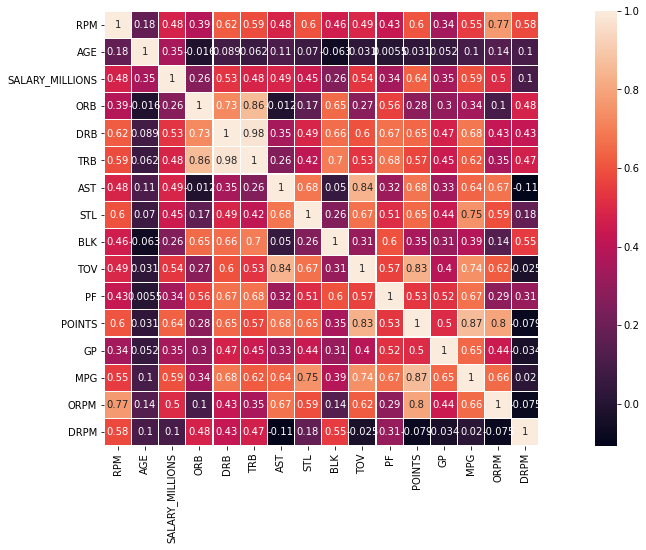

In [20]:
data_part = data.loc[:,["RPM","AGE","SALARY_MILLIONS","ORB","DRB","TRB","AST","STL","BLK","TOV","PF","POINTS","GP","MPG","ORPM","DRPM"]]

data_corr = data_part.corr()    # 获取两列数据之间的相关性。若想只获取两列数据的相关性，例如：data["id"].corr(data["age"])

plt.figure(figsize=(20,8))

# square：设置图形为正方形
# linewidths：在方块之间加上白色线条，以便区分
# annot：在方块上显示数值
sns.heatmap(data_corr,square=True,linewidths=0.2,annot=True)


#### 基本分析

- 薪资最高前10人

In [29]:
data.loc[:,["PLAYER","SALARY_MILLIONS","RPM","AGE","MPG"]].sort_values(by="SALARY_MILLIONS",ascending=False)

,PLAYER,SALARY_MILLIONS,RPM,AGE,MPG
6,LeBron James,30.96,8.42,32,37.8
25,Mike Conley,26.54,4.47,29,33.2
67,Al Horford,26.54,1.82,30,32.3
0,Russell Westbrook,26.50,6.27,28,34.6
1,James Harden,26.50,4.81,27,36.4
...,...,...,...,...,...
280,Anthony Brown,0.06,-1.76,24,14.5
264,Jarell Eddie,0.06,-1.69,25,12.4
299,Jarrett Jack,0.06,-1.84,33,16.5
339,Alonzo Gee,0.06,-1.68,29,6.8


- 效率值最高前10人

In [31]:
data.loc[:,["PLAYER","RPM","SALARY_MILLIONS","AGE","MPG"]].sort_values(by="RPM",ascending=False)

,PLAYER,RPM,SALARY_MILLIONS,AGE,MPG
6,LeBron James,8.42,30.96,32,37.8
37,Chris Paul,7.92,22.87,31,31.5
8,Stephen Curry,7.41,12.11,28,33.4
120,Draymond Green,7.14,15.33,26,32.5
7,Kawhi Leonard,7.08,17.64,25,33.4
...,...,...,...,...,...
207,Marcus Thornton,-4.95,0.98,29,17.4
257,Trey Burke,-5.24,3.39,24,12.3
101,Brandon Knight,-5.32,12.61,25,21.1
92,Jahlil Okafor,-5.69,4.79,21,22.7


- 出场时间最高前10人

In [34]:
data.loc[:,["PLAYER","MPG","SALARY_MILLIONS","RPM","AGE"]].sort_values(by="MPG",ascending=False)

,PLAYER,MPG,SALARY_MILLIONS,RPM,AGE
6,LeBron James,37.8,30.96,8.42,32
32,Zach LaVine,37.2,2.24,-2.97,21
14,Andrew Wiggins,37.2,6.01,-1.60,21
11,Karl-Anthony Towns,37.0,5.96,2.13,21
12,Jimmy Butler,37.0,17.55,6.62,27
...,...,...,...,...,...
336,Diamond Stone,3.4,1.31,-2.28,19
323,Demetrius Jackson,3.4,1.38,-2.07,22
341,Aaron Harrison,3.4,0.87,-1.74,22
337,Brice Johnson,3.0,1.33,-1.24,22


- 出场时间是否与薪资有相关性

In [44]:
salary_mpg = data[["MPG","SALARY_MILLIONS"]]
salary_mpg["MPG"].corr(data["SALARY_MILLIONS"],method="spearman")

0.6203242916904386

#### Seaborn常用的3个数据可视化方法

- 单变量

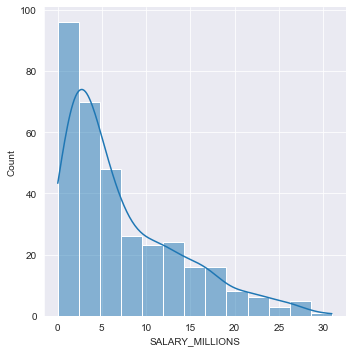

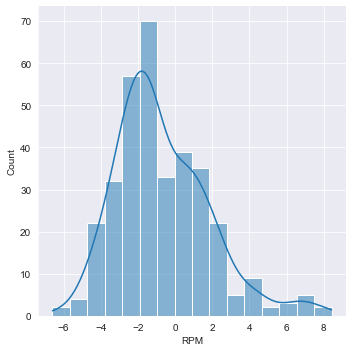

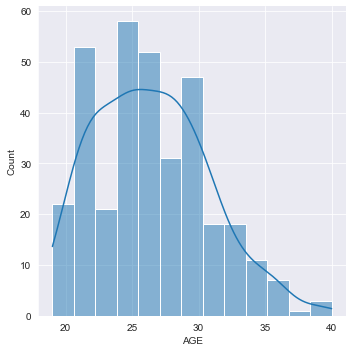

In [106]:
# 利用seaborn中的distplot绘图来分别看一下球员薪水、 效率值、年龄这三个信息的分布情况

sns.set_style("darkgrid")   # 设置画板风格

sns.displot(data,x="SALARY_MILLIONS",kde=True)

sns.displot(data,x="RPM",kde=True)

sns.displot(data,x="AGE",kde=True)

- 双变量

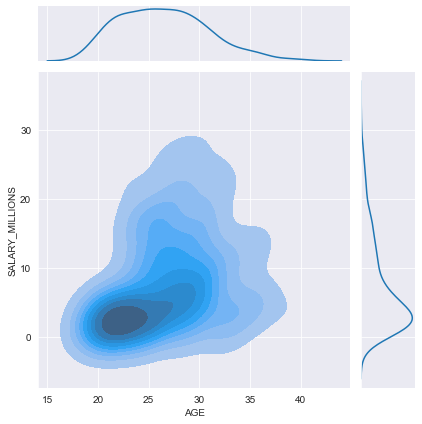

In [120]:
# 年龄与薪水之间的关系
sns.jointplot(x="AGE",y="SALARY_MILLIONS",data=data,kind="kde",joint_kws={"shade":True})

- 多变量

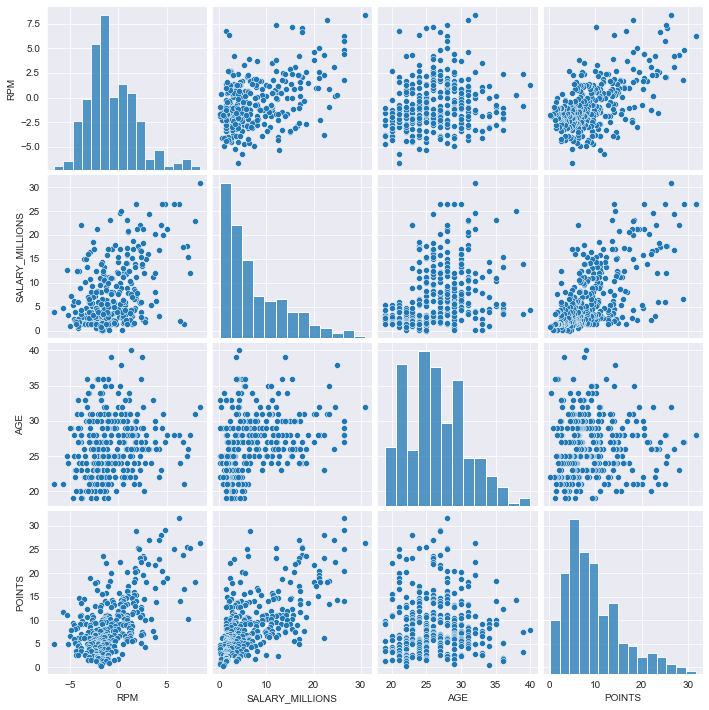

In [122]:
data_part = data.loc[:,["RPM","SALARY_MILLIONS","AGE","POINTS"]]
sns.pairplot(data_part)

#### 衍生变量的可视化-年龄为例

In [159]:
def age_jug(x):
    if x<=23:
        return "YOUNG"
    elif x>23 and x<30:
        return "BEST"
    else:
        return "OLD"

data["AGE_STATE"] = data["AGE"].apply(age_jug)

data.head(10)

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,TEAM,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,AGE_STATE
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,0.343,7.7,16.8,0.459,0.476,8.8,10.4,0.845,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,OKC,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,BEST
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,0.347,5.1,9.6,0.530,0.525,9.2,10.9,0.847,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,HOU,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,BEST
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,0.379,5.8,10.9,0.528,0.546,7.8,8.5,0.909,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9,BOS,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59,BEST
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,0.299,9.7,18.6,0.524,0.518,6.9,8.6,0.802,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,NO,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,YOUNG
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,0.361,7.2,14.8,0.483,0.498,7.2,9.3,0.772,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,NO/SAC,72,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,BEST
5,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,0.370,6.0,12.1,0.492,0.516,6.5,7.3,0.895,0.6,4.3,4.9,5.9,0.9,0.3,2.6,2.0,27.0,POR,75,35.9,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,BEST
6,8,LeBron James,SF,32,37.8,9.9,18.2,0.548,1.7,4.6,0.363,8.3,13.5,0.611,0.594,4.8,7.2,0.674,1.3,7.3,8.6,8.7,1.2,0.6,4.1,1.8,26.4,CLE,74,37.8,6.49,1.93,8.42,20.43,18.3,98.38,51,30.96,OLD
7,9,Kawhi Leonard,SF,25,33.4,8.6,17.7,0.485,2.0,5.2,0.380,6.6,12.5,0.529,0.541,6.3,7.2,0.880,1.1,4.7,5.8,3.5,1.8,0.7,2.1,1.6,25.5,SA,74,33.4,5.83,1.25,7.08,15.53,17.4,95.79,54,17.64,BEST
8,10,Stephen Curry,PG,28,33.4,8.5,18.3,0.468,4.1,10.0,0.411,4.4,8.3,0.537,0.580,4.1,4.6,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3,GS,79,33.4,7.27,0.14,7.41,18.80,15.1,105.08,65,12.11,BEST
9,11,Kyrie Irving,PG,24,35.1,9.3,19.7,0.473,2.5,6.1,0.401,6.9,13.6,0.505,0.535,4.1,4.6,0.905,0.7,2.5,3.2,5.8,1.2,0.3,2.5,2.2,25.2,CLE,72,35.1,4.35,-2.30,2.05,8.28,13.5,99.12,47,17.64,BEST


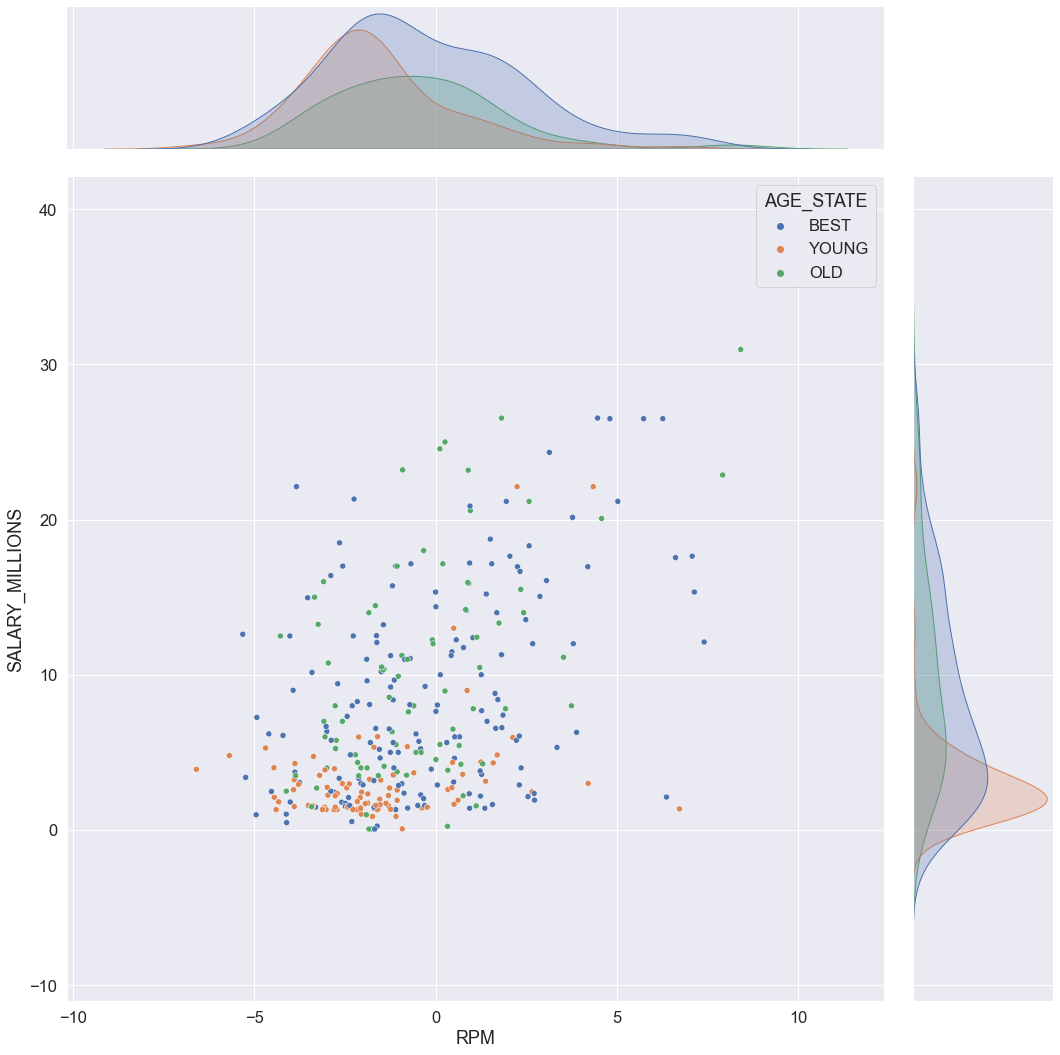

In [221]:
# 基于年龄段对球员薪水和效率值进行分析
sns.set(font_scale=1.5)
sns.jointplot(x="RPM",y="SALARY_MILLIONS",data=data,hue="AGE_STATE",height=15)

### 球队数据分析

In [187]:
data.groupby(by="AGE_STATE").agg({"SALARY_MILLIONS":np.mean})

,SALARY_MILLIONS
AGE_STATE,
BEST,8.442667
OLD,9.936790
YOUNG,3.089896


- 球队薪资排行

In [208]:
data_team = data.groupby(by="TEAM").agg({"SALARY_MILLIONS":np.mean})
data_team.sort_values(by="SALARY_MILLIONS",ascending=False).head()

,SALARY_MILLIONS
TEAM,
CLE,17.095000
HOU,13.432000
GS,12.701429
ORL/TOR,11.125000
POR,9.730000


- 分球队分年龄段，上榜球员降序排列。若上榜球员数相同，则按效率值降序排列。

In [209]:
data_team_age = data.groupby(by=["TEAM","AGE_STATE"]).agg({"RPM":np.mean,"PLAYER":np.size})
data_team_age.sort_values(by=["PLAYER","RPM"],ascending=False)

,,RPM,PLAYER
TEAM,AGE_STATE,,
BOS,BEST,0.647143,7
UTAH,BEST,0.615714,7
MIN,BEST,0.174286,7
DET,BEST,-0.197143,7
POR,BEST,-1.065714,7
...,...,...,...
NO/SAC,YOUNG,-3.200000,1
GS/CHA,BEST,-3.310000,1
ORL,OLD,-3.340000,1


- 利用箱型图和小提琴图对数据进行分析

<AxesSubplot:xlabel='TEAM', ylabel='MPG'>

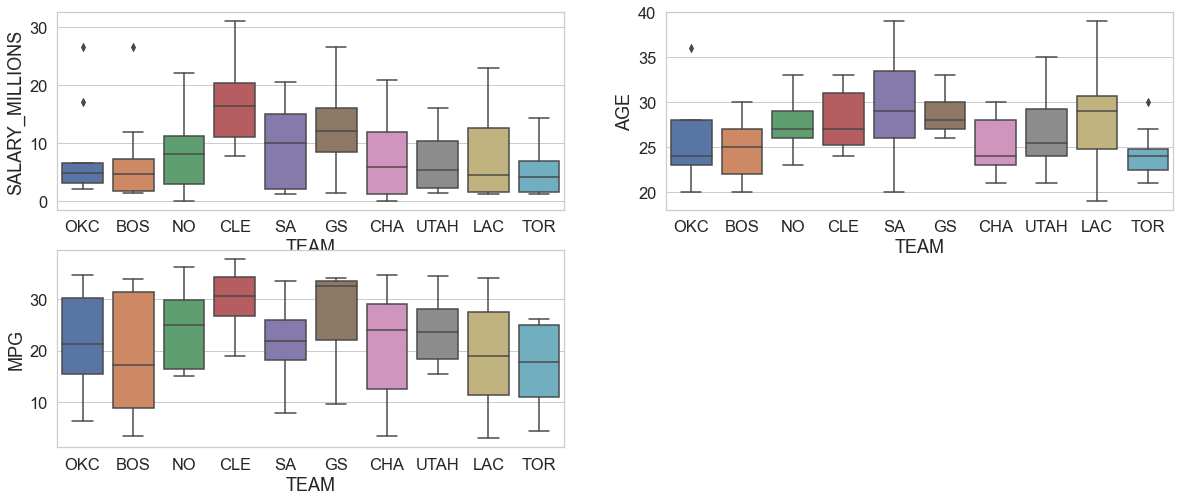

In [223]:
# 箱型图
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

# 获取需要的数据
data_team = data[data["TEAM"].isin(["GS","CLE","SA","LAC","OKC","UTAH","CHA","TOR","NO","BOS"])]

plt.subplot(2,2,1)
sns.boxplot(x="TEAM",y="SALARY_MILLIONS",data=data_team)

plt.subplot(2,2,2)
sns.boxplot(x="TEAM",y="AGE",data=data_team)

plt.subplot(2,2,3)
sns.boxplot(x="TEAM",y="MPG",data=data_team)

<AxesSubplot:xlabel='TEAM', ylabel='eFG%'>

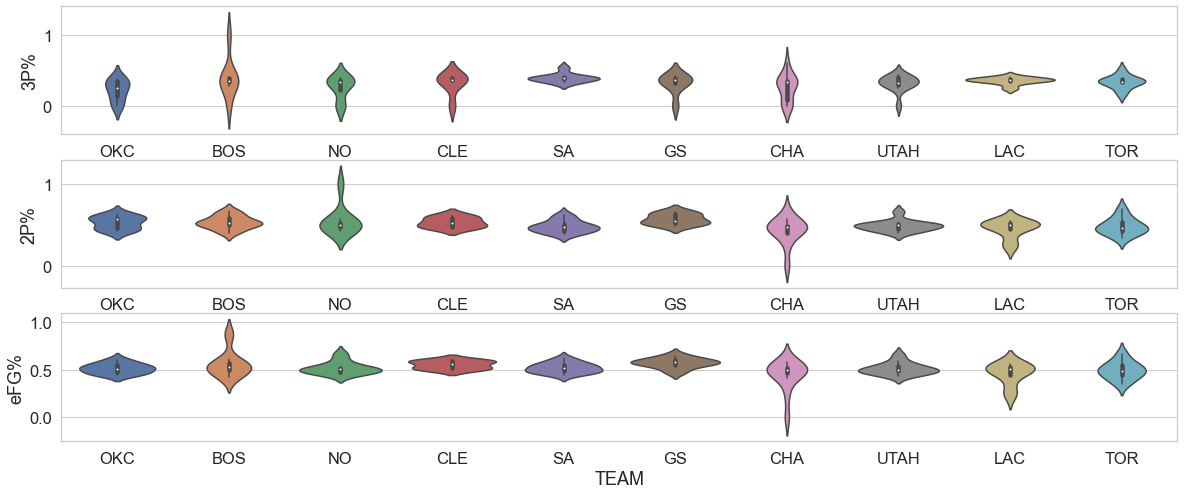

In [231]:
# 小提琴图
sns.set_style("whitegrid")
plt.figure(figsize=(20,8))

plt.subplot(3,1,1)
sns.violinplot(x="TEAM",y="3P%",data=data_team)

plt.subplot(3,1,2)
sns.violinplot(x="TEAM",y="2P%",data=data_team)

plt.subplot(3,1,3)
sns.violinplot(x="TEAM",y="eFG%",data=data_team)